In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Pre-Processing

In [4]:
df = pd.read_csv("data.csv")
df.head()

,date,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,holiday
0,2015-01-01,99635.030,25.633696,97319.240,26.415953,2315.790,-7.240000,0.020833,13.3,26.9,23.6,0.0,N,Y
1,2015-01-02,129606.010,33.138988,121082.015,38.837661,8523.995,-47.809777,0.062500,15.4,38.8,26.8,0.0,N,N
2,2015-01-03,142300.540,34.564855,142300.540,34.564855,0.000,0.000000,0.000000,20.0,38.2,26.5,0.0,N,N
3,2015-01-04,104330.715,25.005560,104330.715,25.005560,0.000,0.000000,0.000000,16.3,21.4,25.2,4.2,N,N
4,2015-01-05,118132.200,26.724176,118132.200,26.724176,0.000,0.000000,0.000000,15.0,22.0,30.7,0.0,N,N


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2106 entries, 0 to 2105
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             2106 non-null   object 
 1   demand           2106 non-null   float64
 2   RRP              2106 non-null   float64
 3   demand_pos_RRP   2106 non-null   float64
 4   RRP_positive     2106 non-null   float64
 5   demand_neg_RRP   2106 non-null   float64
 6   RRP_negative     2106 non-null   float64
 7   frac_at_neg_RRP  2106 non-null   float64
 8   min_temperature  2106 non-null   float64
 9   max_temperature  2106 non-null   float64
 10  solar_exposure   2105 non-null   float64
 11  rainfall         2103 non-null   float64
 12  school_day       2106 non-null   object 
 13  holiday          2106 non-null   object 
dtypes: float64(11), object(3)
memory usage: 230.5+ KB


In [6]:
df.isnull().sum()

date               0
demand             0
RRP                0
demand_pos_RRP     0
RRP_positive       0
demand_neg_RRP     0
RRP_negative       0
frac_at_neg_RRP    0
min_temperature    0
max_temperature    0
solar_exposure     1
rainfall           3
school_day         0
holiday            0
dtype: int64

In [23]:
# Drop rows with missing values
df.dropna(inplace=True);

In [25]:
# Convert date column to DateTime
df['date'] = pd.to_datetime(df['date'])

# Add a weekend column
df['weekend'] = df['date'].dt.dayofweek.apply(lambda x: 1 if x >= 5 else 0)

In [26]:
df.describe()

,date,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,weekend
count,2102,2102.000000,2102.000000,2102.000000,2102.000000,2102.000000,2102.000000,2102.000000,2102.000000,2102.000000,2102.000000,2102.000000,2102.000000
mean,2017-11-18 14:40:18.268315904,120036.408090,76.084873,119251.746306,76.560069,784.661784,-2.691163,0.008563,11.579924,20.415557,14.747526,1.505043,0.285918
min,2015-01-01 00:00:00,85094.375000,-6.076028,41988.240000,13.568986,0.000000,-342.220000,0.000000,0.600000,9.000000,0.700000,0.000000,0.000000
25%,2016-06-10 06:00:00,110011.593750,38.707040,109246.250000,39.117361,0.000000,0.000000,0.000000,8.500000,15.525000,8.200000,0.000000,0.000000
50%,2017-11-17 12:00:00,119605.242500,66.523630,119169.065000,66.853513,0.000000,0.000000,0.000000,11.300000,19.100000,12.750000,0.000000,0.000000
75%,2019-04-29 18:00:00,130436.006250,95.075012,130119.477500,95.130181,0.000000,0.000000,0.000000,14.600000,23.900000,20.775000,0.800000,1.000000
max,2020-10-06 00:00:00,170653.840000,4549.645105,170653.840000,4549.645105,57597.595000,0.000000,0.625000,28.000000,43.500000,33.300000,54.600000,1.000000
std,NaN,13747.235425,130.366950,14819.902317,130.234179,3582.162639,19.503619,0.039999,4.311288,6.289950,7.947423,4.308724,0.451958


In [27]:
# Encode the categorical variables
df_encoded = pd.get_dummies(df, columns=['school_day', 'holiday', 'weekend'])

In [28]:
df_encoded.head()

,date,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day_N,school_day_Y,holiday_N,holiday_Y,weekend_0,weekend_1
0,2015-01-01,99635.030,25.633696,97319.240,26.415953,2315.790,-7.240000,0.020833,13.3,26.9,23.6,0.0,True,False,False,True,True,False
1,2015-01-02,129606.010,33.138988,121082.015,38.837661,8523.995,-47.809777,0.062500,15.4,38.8,26.8,0.0,True,False,True,False,True,False
2,2015-01-03,142300.540,34.564855,142300.540,34.564855,0.000,0.000000,0.000000,20.0,38.2,26.5,0.0,True,False,True,False,False,True
3,2015-01-04,104330.715,25.005560,104330.715,25.005560,0.000,0.000000,0.000000,16.3,21.4,25.2,4.2,True,False,True,False,False,True
4,2015-01-05,118132.200,26.724176,118132.200,26.724176,0.000,0.000000,0.000000,15.0,22.0,30.7,0.0,True,False,True,False,True,False


In [29]:
df_encoded.to_csv("cleaned_data.csv", index=False)

# EDA

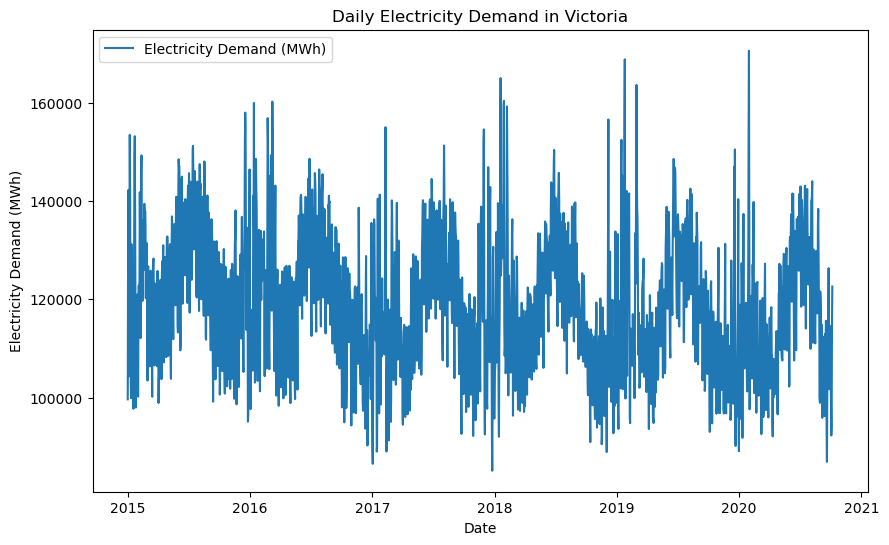

In [30]:
# Plotting the daily demand
plt.figure(figsize=(10, 6))
plt.plot(df_encoded['date'], df_encoded['demand'], label='Electricity Demand (MWh)')
plt.xlabel('Date')
plt.ylabel('Electricity Demand (MWh)')
plt.title('Daily Electricity Demand in Victoria')
plt.legend()
plt.show()

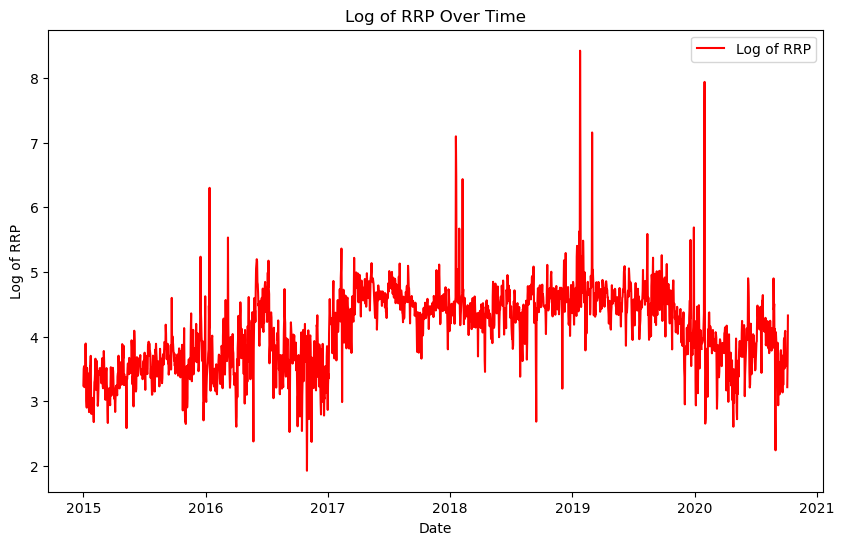

In [37]:
# Plotting the log of RRP over time
plt.figure(figsize=(10, 6))
plt.plot(df_encoded['date'], np.log(df_encoded['RRP']), label='Log of RRP', color='red')
plt.title('Log of RRP Over Time')
plt.xlabel('Date')
plt.ylabel('Log of RRP')
plt.legend()
plt.show()